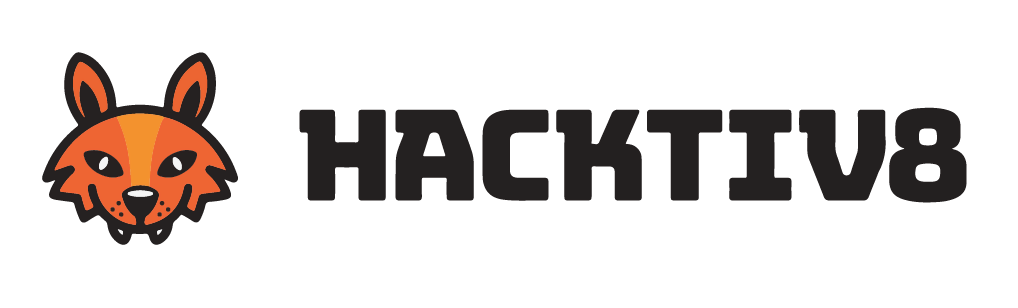

# FINAL PROJECT 1: LINEAR REGRESSION

Project ini disusun guna memenuhi tugas studi independen program **Python for Data Science**

## Introduction

### Our Teams:
1. Haikal Efendi - PYTN-KS08-001
2. Ni Made Kirei Kharisma Handayani - PYTN-KS08-002
3. Rosita Nurul Janatin - PYTN-KS08-005

### Latar Belakang
Uber dan Lyft adalah layanan ride-hailing yang memungkinkan pengguna menyewa kendaraan dengan pengemudi melalui situs web atau aplikasi seluler. uber adalah perusahaan global yang tersedia di 69 negara dan 900 kota di seluruh dunia. sedangkan lyft telah beroperasi di sekitar 644 kota di AS dan 12 kota di Kanada saja. Namun, di AS, uber dan lyft merupakan perusahaan ridesharing terbesar kedua dengan pangsa pasar 31%.

kedua layanan ini memiliki fitur inti yang hampir mirip dari memesan taksi hingga membayar tagihan. tetapi ada beberapa kasus unik dimana kedua layanan ride-hailing ini setara. salah satunya adalah penetapan harga dinamis yang disebut "surge" (lonjakan) di uber dan "prime time" di lyft.

Oleh karena itu, diperlukan suatu analisis untuk memprediksi harga perjalanan (price) yang paling tepat dengan menggunakan algoritma Regresi Linier (Linear Regression). pemilihan algoritma regresi linier dalam project ini memanfaatkan data dari waktu sebelumnya. Regresi linier mencoba memodelkan hubungan antara variabel dependen dan variabel independen dengan membuat persamaan linier untuk mengamati data.

### Data
Dataset yang digunakan adalah Uber and Lyft Dataset Boston, MA yang dapat diakses di kaggle.com. dataset ini memiliki 57 atribut, tetapi atribut yang digunakan hanya yang memiliki kepentingan terhadap targetnya (price) saja.

## Import Libraries

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from numpy import mean
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import kstest
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Warning non-activate
import warnings
warnings.filterwarnings('ignore')

# save model
import cloudpickle
import joblib
import pickle

## Data Loading

### Import Dataset

In [2]:
#mengimport data
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
#menampilkan 5 data teratas
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
#menampilkan 5 data terbawah
df.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


### Dimensi dataset

In [5]:
df.shape

(693071, 57)

dataset terdiri dari 693071 baris dan 57 kolom. hal ini berarti bahwa ada 57 atribut atau variabel dengan 693071 observasi.

### Informasi tipe Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Nilai unique data

In [7]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

## Data Cleaning

### Cek missing values

In [8]:
#cek missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

pada data atribut **price** terlihat missing values sebanyak 55095, sehingga perlu dilakukan penanganan untuk menghilangkan missing values.

### Penanganan missing values
perlu digaris bawahi bahwa atribut **price** merupakan variabel dependen (yang dipengaruhi), sehingga penanganan tidak mungkin dilakukan dengan mengisi missing values tersebut karena dapat menyebabkan nilai akurasi yang kurang akurat. maka, penanganan dilakukan dengan menghapus baris yang terdapat missing values / drop missing value pada kolom price.

In [9]:
df = df.dropna(subset=['price']).reset_index()

### Cek kembali untuk memastikan tidak ada missing values

In [10]:
df.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

terlihat bahwa sudah tidak ada lagi missing values

## Slicing Data
melakukan drop pada sejumlah atribut karena beberapa alasan seperti:
- **index** tidak diperlukan karena duplikasi dari index sudah ada
- **id** tidak diperlukan karena nilainya sangat unik dan mewakili setiap input
- **timestamp** dan **datetime** tidak diperlukan karena sudah dipecah menjadi month, day, dan hour
- **long_summary** karena sudah diwakili atribut **short_summary**
- atribut yang berkaitan dengan waktu, seperti datetime, windGustTime dan lainnya, tidak diperlukan karena sudah diwakili oleh atribut **month**, **day**, dan **hour**
- **Longtitude** dan **Latitude** tidak diperlukan karena sudah diwakili oleh **Destination**
- dan yang lainnya

sehingga dari 57 atribut hanya diambil atribut berikut ini:
- cab_type: Brand transportasi online
- Name: jenis mobil yang dipilih
- Hour: jam pemesanan transportasi online
- Day: tanggal pemesanan transportasi online
- Month: Bulan pemesanan transportasi online
- Source: Destinasi awal
- destination: tujuan
- Price: Harga transportasi online
- Distance: Jarak tempuh
- Short_summary: Cuaca ketika pemesanan transportasi online
- windSpeed:Kecepatan angin
- Temperature: suhu ketika pemesanan transportasi online
- Visibility: jarak penglihatan
- Surge_multiplier: kenaikan harga penawaran ketika terjadi lonjakan penumpang

In [11]:
df = df[['cab_type',
              'name', 
              'hour', 
              'day', 
              'month', 
              'source', 
              'destination', 
              'price', 
              'distance', 
              'short_summary', 
              'windSpeed', 
              'temperature', 
              'visibility', 
              'surge_multiplier']]
df.head()

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0


In [12]:
#dimensi feature
df.shape

(637976, 14)

data yang dibutuhkan terdiri dari 14 atribut dengan 637976 observasi

In [13]:
#mengecek total data pada setiap atribut
for col in df.columns:
    print(col,': ')
    print(df[col].value_counts())
    print("  ")
    print("  ")

cab_type : 
Uber    330568
Lyft    307408
Name: cab_type, dtype: int64
  
  
name : 
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64
  
  
hour : 
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: hour, dtype: int64
  
  
day : 
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: day, dtype: int64
  
  
month : 
12    374205
11    263771
Name: month, dtyp

## Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,hour,day,month,price,distance,windSpeed,temperature,visibility,surge_multiplier
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,6.186795,39.582406,8.469180,1.015068
std,6.948776,9.982083,0.492452,9.324359,1.135413,3.147856,6.725500,2.601828,0.095422
min,0.000000,1.000000,11.000000,2.500000,0.020000,0.450000,18.910000,0.717000,1.000000
25%,6.000000,13.000000,11.000000,9.000000,1.270000,3.410000,36.450000,8.432000,1.000000
50%,12.000000,17.000000,12.000000,13.500000,2.160000,5.910000,40.490000,9.880000,1.000000
75%,18.000000,28.000000,12.000000,22.500000,2.930000,8.410000,43.580000,9.996000,1.000000
max,23.000000,30.000000,12.000000,97.500000,7.860000,15.000000,57.220000,10.000000,3.000000


dari tabel statistik diperoleh informasi:
- Tarif paling murah untuk penggunaan layanan jasa adalah 2.5 Dollar dan paling mahal sebesar 97.5 Dollar
- Rata-rata harga penggunaan layanan jasa sekitar 16.5 Dollar
- standar deviasi dari harga sebesar 9.32, lebih besar dari pada rata-rata harga. hal ini berarti bahwa data bersifat heterogen karena sebaran data bervariasi.

## Explore Feature

### 1. cab_type (brand transportasi online)

In [15]:
#membuat variabel berisi total dari setiap type
df_cab_type = df['cab_type'].value_counts()
df_cab_type

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

#### Visualisasi cab_type

Text(0.5, 0, 'Jenis Brand Layanan Transportasi Online')

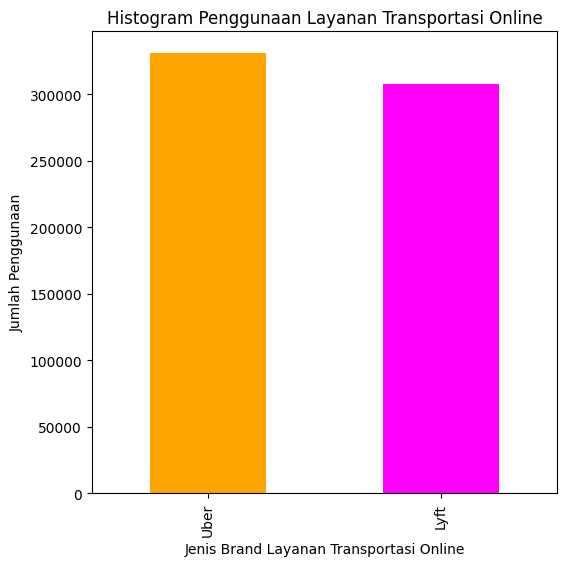

In [16]:
# bar chart
df_cab_type.plot(kind='bar', figsize=(6,6), color=["orange", "magenta"])

plt.title('Histogram Penggunaan Layanan Transportasi Online')
plt.ylabel('Jumlah Penggunaan')
plt.xlabel('Jenis Brand Layanan Transportasi Online')

**Interpretasi:**

pada plot yang dihasilkan terlihat bahwa pengguna jasa uber lebih banyak dibandingkan lyft dimana masing masing memiliki jumlah total 330568 penumpang Uber dan 307408 penumpang lyft

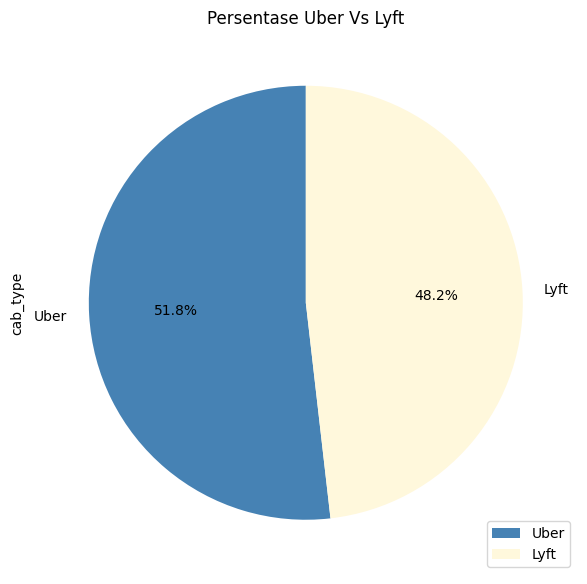

In [17]:
# Pie Chart
df_cab_type.plot(kind='pie',
                figsize=(7,8),
                autopct='%1.1f%%',  #add in percentages
                startangle=90,      #start angle 90 derajat
                colors=['steelblue', 'cornsilk'],
        )
plt.title('Persentase Uber Vs Lyft')
plt.legend(labels = df_cab_type.index, loc='lower right')
plt.show()

**Interpretasi:**

Pada pie charts yang dihasilkan, diketahui bahwa persentase penggunaan Uber sebesar 51.8% dan Lyft sebesar 48.2%. hal ini semakin menunjukkan bahwa penggunaan Uber lebih diminati warga dibandingkan Lyft

### 2. name (jenis mobil)

In [18]:
#membuat variabel name
df_name = pd.DataFrame(df.groupby(['cab_type'])['name'].value_counts())
df_name

name
cab_type name               
Lyft     Lux           51235
         Lux Black     51235
         Lux Black XL  51235
         Lyft          51235
         Lyft XL       51235
         Shared        51233
Uber     Black SUV     55096
         UberXL        55096
         WAV           55096
         Black         55095
         UberX         55094
         UberPool      55091

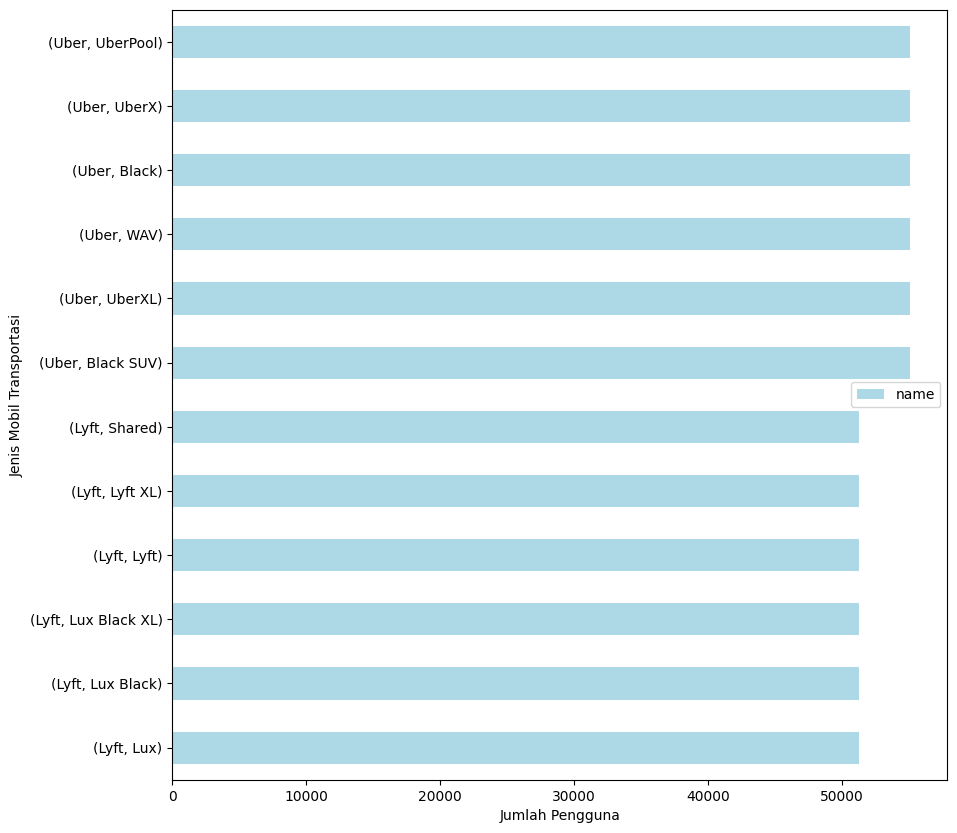

In [19]:
# Horizontal bar plot
df_name.plot(kind='barh', figsize=(10,10), color='lightblue')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Jenis Mobil Transportasi')
plt.show()

**Interpretasi:**

Bar chart yang dihasilkan menunjukkan bahwa dalam segi jenis mobil yang dilayankan Uber masih lebih unggul dibandingkan dengan Lyft.

### 3. Month (Bulan)

In [20]:
#membuat variabel month
df_month = df['month'].value_counts()
df_month

12    374205
11    263771
Name: month, dtype: int64

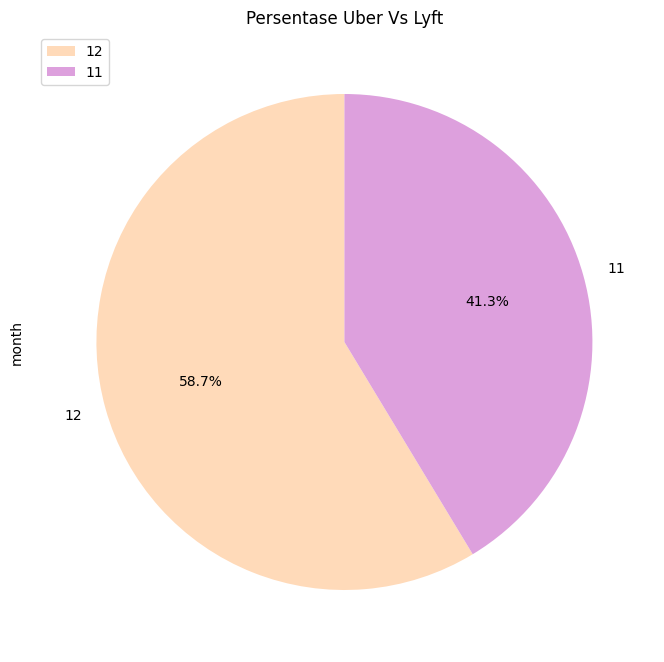

In [21]:
# visualisasi month dalam bentuk pie chart
df_month.plot(kind='pie',
                figsize=(8,10),
                autopct='%1.1f%%',  #add in percentages
                startangle=90,      #start angle 90 derajat
                colors=['peachpuff', 'plum'],
        )
plt.title('Persentase Uber Vs Lyft')
plt.legend(labels=df_month.index, loc='upper left')
plt.show()

**Interpretasi:**

dari hasil pie chart diatas, diketahui bahwa pada atribut month hanya terdapat bulan 11 (November) dan 12 (Desember). pada bulan November memiliki persentase penggunaan sebesar 41.3%, sedangkan Desember sebesar 58.7%. hal ini terjadi karena pada bulan Desember terdapat perayaan hari raya natal dimana sebagian besar warga AS ikut merayakan dan tahun baru yang bersamaan dengan pergantian tahun ajaran baru (anak sekolah) sehingga semua orang memiliki waktu liburan dan membutuhkan jasa layanan transportasi untuk melakukan suatu perjalanan.

## Data Preprocessing

### Encoding


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          637976 non-null  object 
 1   name              637976 non-null  object 
 2   hour              637976 non-null  int64  
 3   day               637976 non-null  int64  
 4   month             637976 non-null  int64  
 5   source            637976 non-null  object 
 6   destination       637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   short_summary     637976 non-null  object 
 10  windSpeed         637976 non-null  float64
 11  temperature       637976 non-null  float64
 12  visibility        637976 non-null  float64
 13  surge_multiplier  637976 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 68.1+ MB


In [23]:
# encoding data kategorik
ct = ColumnTransformer([
    ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
    ['cab_type', 'name', 'source', 'destination', 'short_summary']), 
    
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_rfe = ct.fit_transform(df[['cab_type', 'name', 'source', 'destination', 'short_summary']])

# menyimpan encoding menggunakan pickle
pickle.dump(ct, open('encoding.pkl', 'wb'))


In [24]:
#menampilkan df_rfe
df_rfe

array([[ 0.,  7.,  5.,  7.,  4.],
       [ 0.,  2.,  5.,  7.,  8.],
       [ 0.,  5.,  5.,  7.,  0.],
       ...,
       [ 1.,  9., 11.,  6.,  6.],
       [ 1.,  1., 11.,  6.,  6.],
       [ 1.,  8., 11.,  6.,  6.]])

In [25]:
# membuat dataframe df_rfe
df_rfe = pd.DataFrame(df_rfe, columns=['cab_type', 'name', 'source', 'destination', 'short_summary'])
df_rfe.head()

,cab_type,name,source,destination,short_summary
0,0.0,7.0,5.0,7.0,4.0
1,0.0,2.0,5.0,7.0,8.0
2,0.0,5.0,5.0,7.0,0.0
3,0.0,4.0,5.0,7.0,0.0
4,0.0,6.0,5.0,7.0,6.0


In [26]:
# menggabungkan data kategorik hasil encoding dan data numerik
df_rfe = df_rfe.join(df.drop(columns=['cab_type', 'name', 'source', 'destination', 'short_summary']))

In [27]:
df_rfe.head()

,cab_type,name,source,destination,short_summary,hour,day,month,price,distance,windSpeed,temperature,visibility,surge_multiplier
0,0.0,7.0,5.0,7.0,4.0,9,16,12,5.0,0.44,8.66,42.34,10.000,1.0
1,0.0,2.0,5.0,7.0,8.0,2,27,11,11.0,0.44,11.98,43.58,4.786,1.0
2,0.0,5.0,5.0,7.0,0.0,1,28,11,7.0,0.44,7.33,38.33,10.000,1.0
3,0.0,4.0,5.0,7.0,0.0,4,30,11,26.0,0.44,5.28,34.38,10.000,1.0
4,0.0,6.0,5.0,7.0,6.0,3,29,11,9.0,0.44,9.14,37.44,10.000,1.0


In [28]:
df_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          637976 non-null  float64
 1   name              637976 non-null  float64
 2   source            637976 non-null  float64
 3   destination       637976 non-null  float64
 4   short_summary     637976 non-null  float64
 5   hour              637976 non-null  int64  
 6   day               637976 non-null  int64  
 7   month             637976 non-null  int64  
 8   price             637976 non-null  float64
 9   distance          637976 non-null  float64
 10  windSpeed         637976 non-null  float64
 11  temperature       637976 non-null  float64
 12  visibility        637976 non-null  float64
 13  surge_multiplier  637976 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 68.1 MB


### Feature Selection
Mengukur Pengaruh atribut pada label sesuai jenis atribut

#### Correlation Matrix

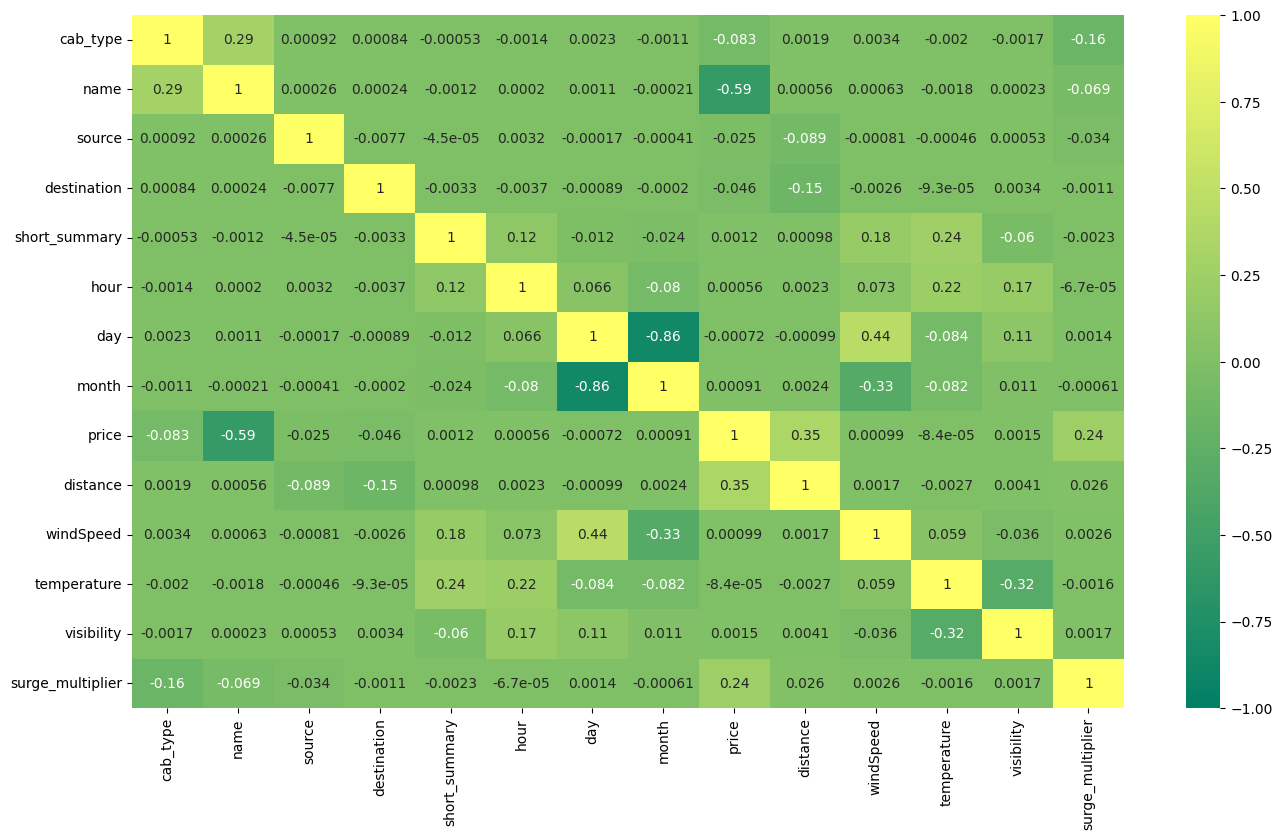

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(df_rfe.corr(), vmin=-1, vmax=1, annot=True, cmap='summer')
plt.show()

**Interpretasi:**

berdasarkan matrix korelasi antara feature dan label (price), diketahui bahwa **temperature**, **month**, **day**, dan **hour** memiliki **nilai korelasi sangat kecil** terhadap atribut price, artinya fitur tersebut tidak terlalu berpengaruh terhadap label (**price**). sehingga atribut tersebut perlu dihilangkan dari dataset

#### Menghapus Feature yang tidak berkepentingan terhadap label
selanjutnya menghapus beberapa atribut feature yang memiliki nilai korelasi yang sangat kecil karena atribut tersebut tidak memiliki kepentingan terhadap target (label).

In [30]:
# menghapus feature yang tidak berkepentingan
df_fix = df_rfe.drop(columns=['temperature', 'month', 'day', 'hour'])
df_fix.head()

,cab_type,name,source,destination,short_summary,price,distance,windSpeed,visibility,surge_multiplier
0,0.0,7.0,5.0,7.0,4.0,5.0,0.44,8.66,10.000,1.0
1,0.0,2.0,5.0,7.0,8.0,11.0,0.44,11.98,4.786,1.0
2,0.0,5.0,5.0,7.0,0.0,7.0,0.44,7.33,10.000,1.0
3,0.0,4.0,5.0,7.0,0.0,26.0,0.44,5.28,10.000,1.0
4,0.0,6.0,5.0,7.0,6.0,9.0,0.44,9.14,10.000,1.0


In [31]:
df_fix.nunique()

cab_type              2
name                 12
source               12
destination          12
short_summary         9
price               147
distance            549
windSpeed           291
visibility          227
surge_multiplier      7
dtype: int64

### Mendefinisikan X dan Y

In [32]:
X = df_fix.drop(['price'], axis=1)
Y = df_fix['price']
print('variabel X:', X.columns.tolist())
print('Variabel Y:', Y.name)

variabel X: ['cab_type', 'name', 'source', 'destination', 'short_summary', 'distance', 'windSpeed', 'visibility', 'surge_multiplier']
Variabel Y: price


sampai tahap ini atribut feature (X) dan label (Y) telah siap untuk dilakukan pemodelan.

## Modelling
setelah dilakukan data cleaning dan data preprocessing, maka diperoleh data feature dan data label untuk selanjutnya digunakan untuk melatih model. feature yang digunakan diantaranya:
- cab_type
- name
- source
- destination
- distance
- short_summary
- windSpeed
- visibility
- surge_multiplier

Algoritma yang digunakan dalam pemodelan ini adalah **Linear Regression**

### Split data

In [33]:
#membagi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size=0.2, random_state=10)

In [34]:
# membagi data training menjadi data training dan data validation untuk model inference
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                   test_size=0.1, random_state=10)

In [35]:
# standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

### Pelatihan Model

In [36]:
# melatih model dengan data training
LR = LinearRegression()
Linear_Regression = LR.fit(X_train_scaled, Y_train)

In [37]:
Y_predict = Linear_Regression.predict(X_test_scaled)

In [38]:
mod = sm.OLS(Y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                          5.336e+05
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:00:57   Log-Likelihood:                     -2.0998e+06
No. Observations:              637976   AIC:                                  4.200e+06
Df Residuals:                  637967   BIC:                                  4.200e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cab_type             2.2278      0.017    131.691      0.000       2.195       2.261
name                -1.6317      0.002   -676.315      0.000      -1.636      -1.627
source               0.0210      0.002      8.985      0.000       0.016       0.026
destination          0.0030      0.002      1.278      0.201      -0.002       0.008
short_summary       -0.0162      0.004     -3.956      0.000      -0.024      -0.008
distance             2.7693      0.007    385.492      0.000       2.755       2.783
windSpeed           -0.0112      0.003     -4.279      0.000      -0.016      -0.006
visibility          -0.0249      0.003     -8.256      0.000      -0.031      -0.019
surge_multiplier    18.3214      0.040    455.420      0.000      18.243      18.400
==============================================================================
Omnibus:                    70597.855   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104206.039
Skew:                           0.837   Prob(JB):                         0.00
Kurtosis:                       4.057   Cond. No.                         75.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

pada output diperoleh:
- nilai probabilitas F sebesar **0.00** dimana nilai tersebut **kurang dari alfa 5%** sehingga **model regresi tersebut cocok**. 
- nilai **p>|t|** pada semua atribut sebesar  **0.000** dimana nilai tersebut **kurang dari alfa** sehingga **koefisien regresi signifikan terhadap label**.
- nilai R-squared sebesar **0.85** yang berarti bahwa feature mempengaruhi label sebesar **85%** dan **15%** sisanya dipengaruhi faktor lain.

R squared atau R2 merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Semakin mendekati angka satu, model yang dikeluarkan oleh regresi tersebut akan semakin baik.

In [39]:
print('Linear Regression train R Squared: %.4f' % Linear_Regression.score(X_train_scaled, Y_train))
print('Linear Regression test R Squared: %.4f' %Linear_Regression.score(X_test_scaled, Y_test))

Linear Regression train R Squared: 0.5141
Linear Regression test R Squared: 0.5145


In [40]:
skor = metrics.r2_score(Y_test, Y_predict) *100
print('Nilai Akurasi Model Linear Regression: %1.2f%%' %skor)

Nilai Akurasi Model Linear Regression: 51.45%


nilai akurasi sebesar 51% menunjukkan bahwa model kurang akurat untuk memprediksi, sehingga terindikasi bahwa model Linier Regression kurang tepat digunakan. sehingga perlu dilakukan transformasi ke model **Regresi Polynomial**

### Transformasi ke bentuk Regresi Polynomial

#### 1. Polynomial Regression ( d = 2 )

In [41]:
poly_reg_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_reg_2.fit_transform(X)

#split data
poly_2_X_train,poly_2_X_test,y_train,y_test = train_test_split(X_poly_2, Y,
                                                               test_size=0.2,random_state=10)
# membagi data training menjadi data training dan data validation untuk model inference
poly_2_X_train, poly_2_X_val, y_train, y_val = train_test_split(poly_2_X_train, y_train,
                                                   test_size=0.1, random_state=10)
# membuat pipeline untuk standarisasi data dan melatih model
pipe2 = Pipeline([('scaler', StandardScaler()), ('LR2', LinearRegression())])
LR2 = pipe2.fit(poly_2_X_train, y_train)

In [42]:
# membuat prediksi model
Y2_pred = pipe2.predict(poly_2_X_test)

In [43]:
# melihat skor akurasi R^2
skor = metrics.r2_score(y_test, Y2_pred) *100
print('Nilai Akurasi Model Polynomial Regresi (d = 2): %1.2f%%' %skor)

Nilai Akurasi Model Polynomial Regresi (d = 2): 55.84%


#### 2. Polynomial Regression ( d = 3 )

In [44]:
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_reg_3.fit_transform(X)

#split data
poly_3_X_train,poly_3_X_test,y_train,y_test = train_test_split(X_poly_3, Y,
                                                               test_size=0.2,random_state=10)

# membagi data training menjadi data training dan data validation untuk model inference
poly_3_X_train, poly_3_X_val, y_train, y_val = train_test_split(poly_3_X_train, y_train,
                                                   test_size=0.1, random_state=10)

# membuat pipeline untuk standarisasi data dan melatih model
pipe3 = Pipeline([('scaler', StandardScaler()), ('LR3', LinearRegression())])
LR3 = pipe3.fit(poly_3_X_train, y_train)



In [45]:
# membuat prediksi model
Y3_pred = pipe3.predict(poly_3_X_test)

In [46]:
# melihat skor akurasi R^2
skor = metrics.r2_score(y_test, Y3_pred) *100
print('Nilai Akurasi Model Polynomial Regresi (d = 3): %1.2f%%' %skor)

Nilai Akurasi Model Polynomial Regresi (d = 3): 71.40%


### Model Evaluation

#### Membandingkan semua model yang memungkinkan

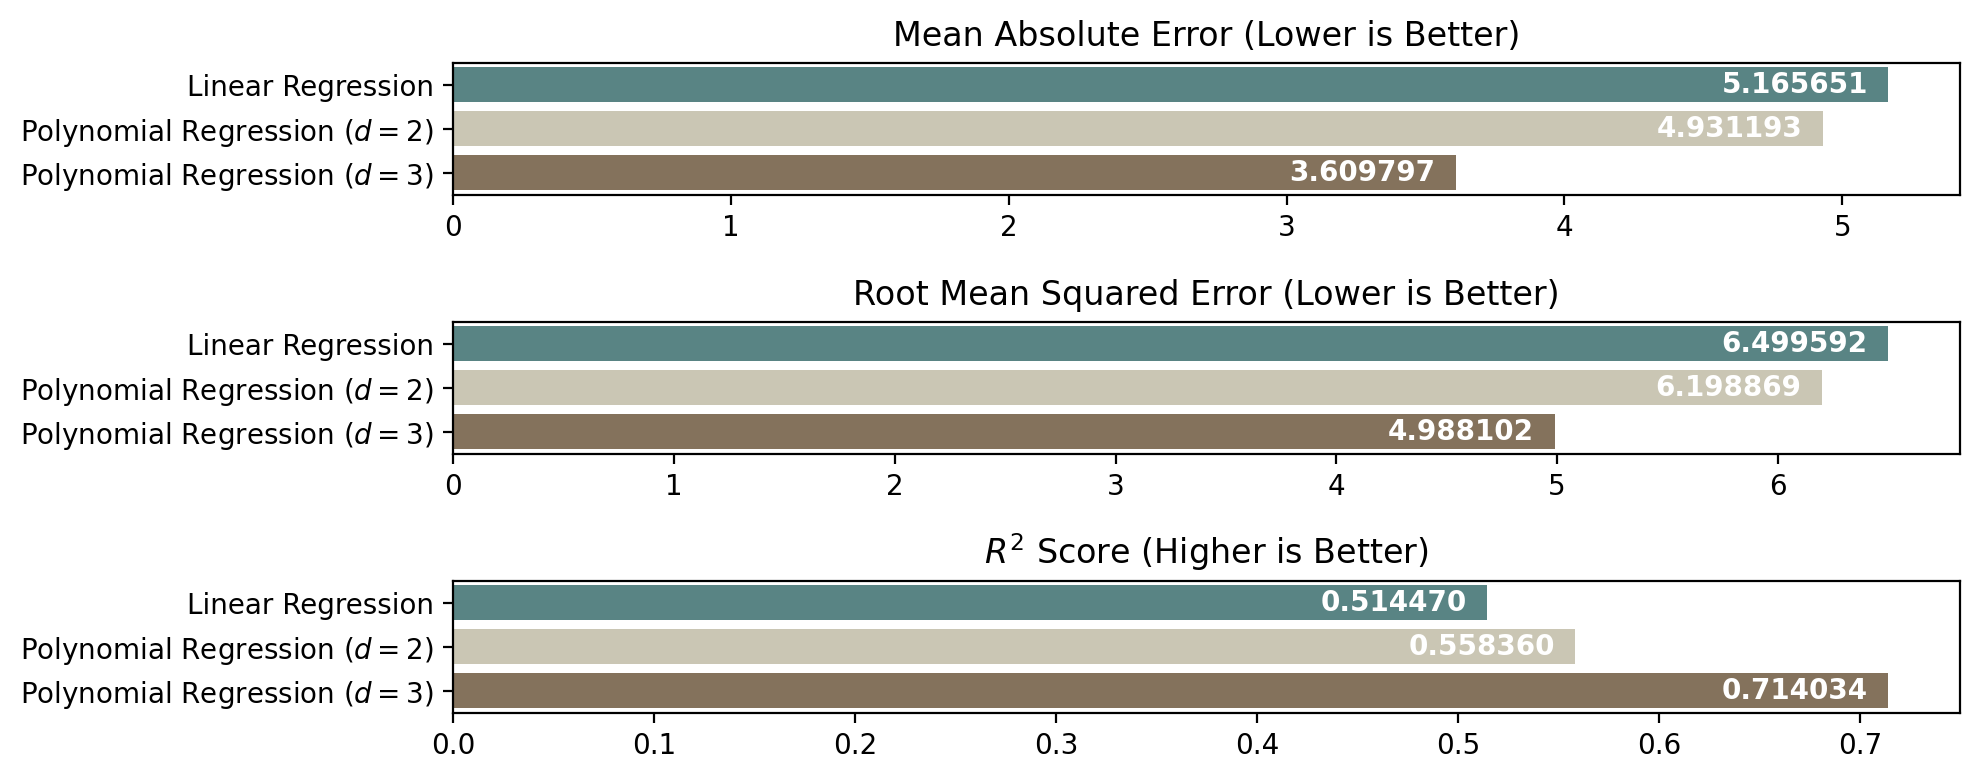

In [47]:
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(Y_test,Y_predict),mean_absolute_error(y_test,Y2_pred),mean_absolute_error(y_test,Y3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#528B8B","#CDC8B1","#8B7355"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(Y_test,Y_predict)),np.sqrt(mean_squared_error(y_test,Y2_pred)),np.sqrt(mean_squared_error(y_test,Y3_pred))],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#528B8B","#CDC8B1","#8B7355"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(Y_test,Y_predict),r2_score(y_test,Y2_pred),r2_score(y_test,Y3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#528B8B","#CDC8B1","#8B7355"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

berdasarkan plot yang dihasilkan dapat dibuktikan bahwa model Polynomial Regression dengan d = 3 merupakan model paling akurat berdasarkan perbandingan nilai MAE, RMSE, dan R Square. Indikasi model terbaik diperoleh dari nilai MAE dan RMSE paling kecil dan nilai R-square paling besar.

#### Menguji kecocokan model terhadap data training dan testing

In [48]:
# membuat y prediksi menggunakan data training
Y3_pred_train = pipe3.predict(poly_3_X_train)

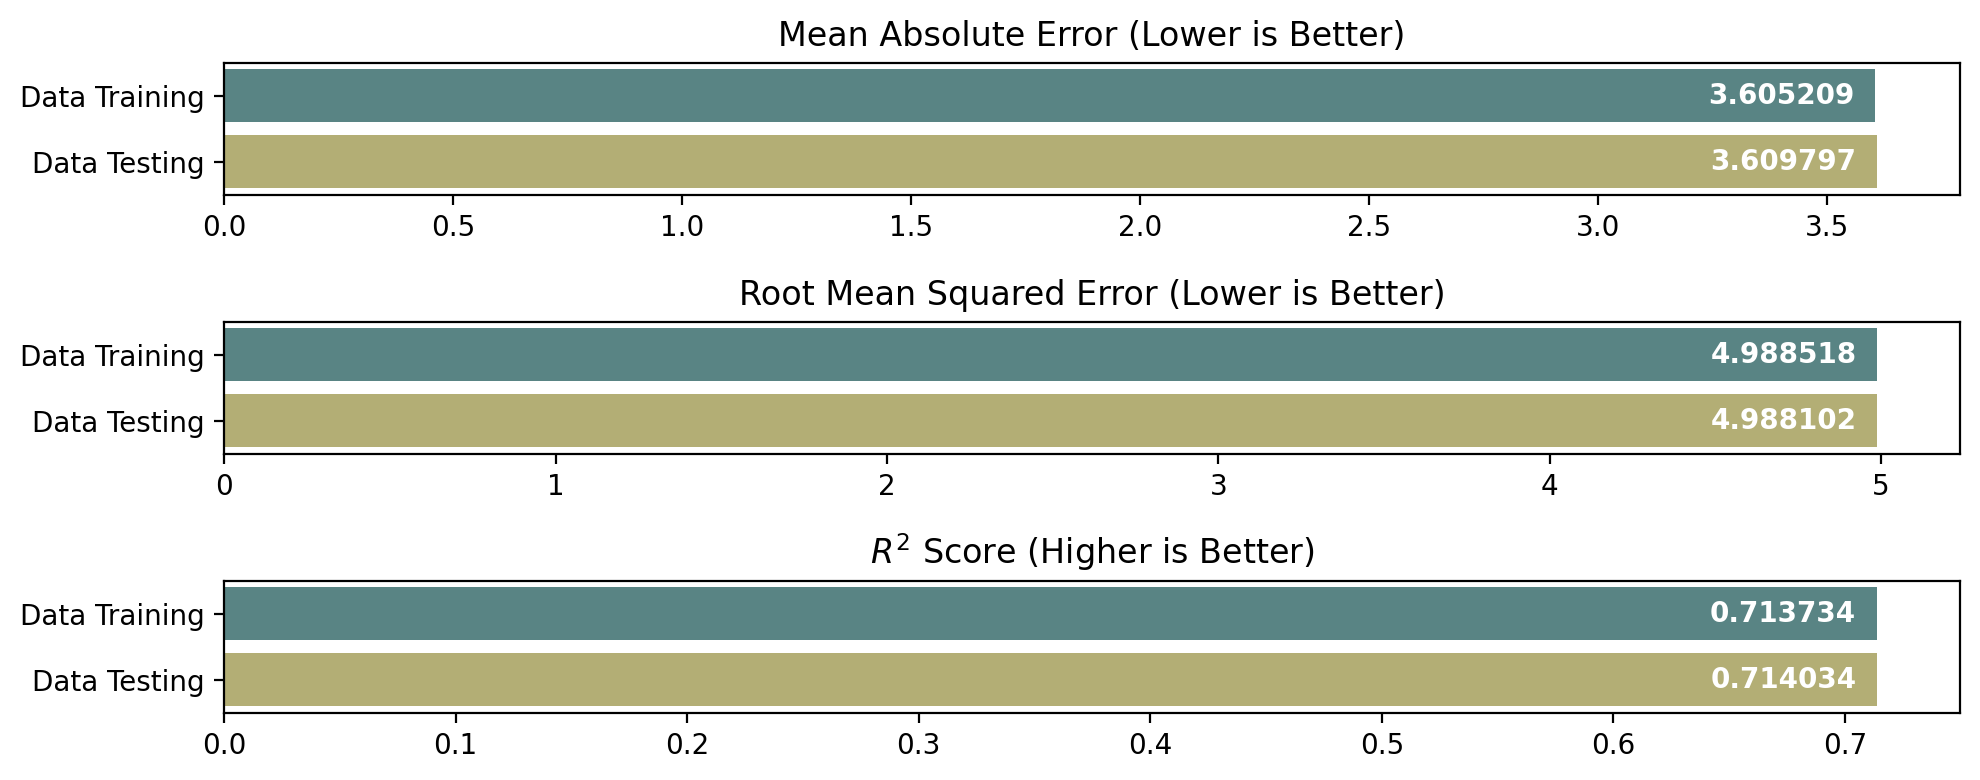

In [49]:
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_train,Y3_pred_train),mean_absolute_error(y_test,Y3_pred)],
    y=["Data Training","Data Testing"],
    palette=["#528B8B","#BDB76B"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_train, Y3_pred_train)),np.sqrt(mean_squared_error(y_test,Y3_pred))],
    y=["Data Training","Data Testing"],
    palette=["#528B8B","#BDB76B"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_train,Y3_pred_train),r2_score(y_test,Y3_pred)],
    y=["Data Training","Data Testing"],
    palette=["#528B8B","#BDB76B"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

Berdasarkan plot yang dihasilkan terlihat bahwa nilai MAE, RMSE, dan R^2 pada data training dan data testing berdasarkan model **Polynomial Regressi d = 3** memiliki nilai yang tidak jauh berbeda sehingga bisa disimpulkan bahwa model yang dihasilkan mengalami **Good Fitting**.


### Scatter plot model terbaik

Text(0, 0.5, 'Predicted Y')

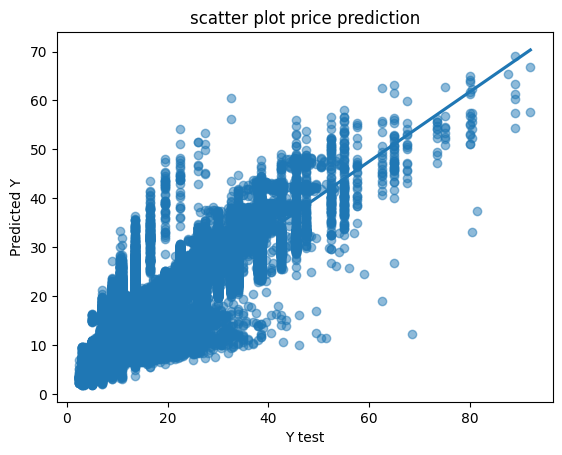

In [50]:
sns.regplot(x=y_test,y=Y3_pred,
            scatter_kws={'alpha':0.5}, 
            fit_reg=True)
plt.title("scatter plot price prediction")
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

pada plot yang dihasilkan model polynomial regression dengan d = 3 terlihat bahwa plot y prediksi **berbanding lurus** dengan plot y test

## Model Inference

In [51]:
predict = pipe3.predict(poly_3_X_val)
predict

array([ 9.70005666,  9.97740041, 16.52427541, ..., 15.78404103,
       25.48033009, 10.47593556])

In [52]:
# skor akurasi model inference
skor_inference = metrics.r2_score(y_val, predict) *100
print('Nilai Akurasi Model Linear Regression: %1.2f%%' %skor)

Nilai Akurasi Model Linear Regression: 71.40%


## Save Model in Pickle File

In [53]:
#simpan model dan transform polynomial (d = 3) kedalam file dengan pickle
pickle.dump(poly_reg_3, open('poly_reg_3.pkl', 'wb'))
pickle.dump(LR3, open('model_poly3.pkl', 'wb'))

## Kesimpulan
Berdasarkan hasil dari proses analisis sebelumnya, dapat diambil kesimpulan:
1. pada dataset yang terdiri dari 57 atribut, diambil 9 atribut yang paling berpengaruh dalam memprediksi harga layanan transportasi online. atribut tersebut terdiri dari **cab_type, name, source, destination, distance, short_summary, windSpeed, visibility, dan surge_multiplier**.
2. nilai akurasi pada model linier regression sebesar 51% menunjukkan bahwa model kurang akurat untuk memprediksi, sehingga terindikasi bahwa model Linier Regression kurang tepat digunakan. sehingga perlu dilakukan transformasi ke model **Regresi Polynomial**
3. model terbaik di peroleh dari model polynomial regresi dengan d = 3 dengan nilai akurasi sebesar 71%, MAE 3.6, dan RMSE 4.98
4. Setelah dilakukan pengujian nilai R-squared, MAE, dan RMSE diperoleh nilai yang tidak jauh berbeda pada data training dan data testing, sehingga dapat disimpulkan bahwa model yang dihasilkan mengalami **good fitting**.